In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize']=(13,4)
plt.style.available
plt.style.use('seaborn-colorblind')

In [2]:
##reading dataset
data=pd.read_csv("drug.csv")

data.shape ##the records and columns

(161297, 7)

In [3]:
data.head()   #data for studying

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
data.rename(columns={'uniqueID':'id','drugName':'drug','usefulCount':'useful'})

,id,drug,condition,review,rating,date,useful
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [5]:
print("Number of unique drugs :",data['drugName'].nunique())
print("Number of unique medical conditions",data['condition'].nunique())

print("\ndata collected from ")
print("starting date:",data['date'].min())
print("end date:",data['date'].max())

Number of unique drugs : 3436
Number of unique medical conditions 884

data collected from 
starting date: 1-Apr-08
end date: 9-Sep-17


### Summarizing the Dataset

In [6]:
data.describe()   #knowing statistical values 

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


#### useless drug    //drugs with zero useful count

In [7]:
print("Number of Drugs with No Useful Count :", data[data['usefulCount'] == 0].count()[0])
print("Number of Drugs with Lesser Useful Count but good ratings:", data[(data['usefulCount'] == 0) &
                                                data['rating'] >= 8].count()[0])

Number of Drugs with No Useful Count : 6318
Number of Drugs with Lesser Useful Count but good ratings: 0


#### useful drugs                     

In [8]:
print("The Number of Drugs with Greater than 1000 Useful Counts :", data[data['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", data[data['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of these Drugs: \n\n", 
    data[data['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

The Number of Drugs with Greater than 1000 Useful Counts : 4
Average Rating of Drugs with 1000+ Useful Counts : 10.0

Name and Condition of these Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [9]:
data.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


# Data Cleaning

In [10]:
#Missing Values
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [11]:
#delete all the records where Condition is Missing
data = data.dropna()
data.isnull().sum().sum()

0

# Patterns From The Data

C:\Users\Ishita Bahuguna\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-0d043d64976e>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
C:\Users\Ishita Bahuguna\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

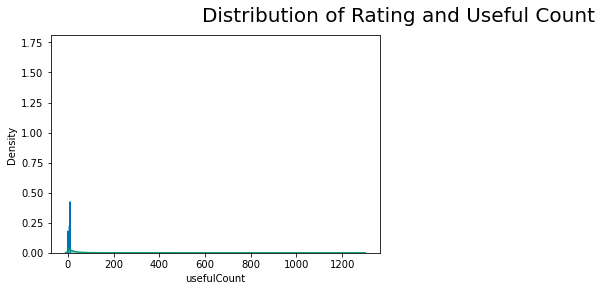

In [12]:
## distribution graph
plt.subplot(1, 2, 1)
sns.distplot(data['rating'])
plt.subplot(1, 2, 2)
sns.distplot(data['usefulCount'])
plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

# Check the impact of rating on usefulcount of drugs 

C:\Users\Ishita Bahuguna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


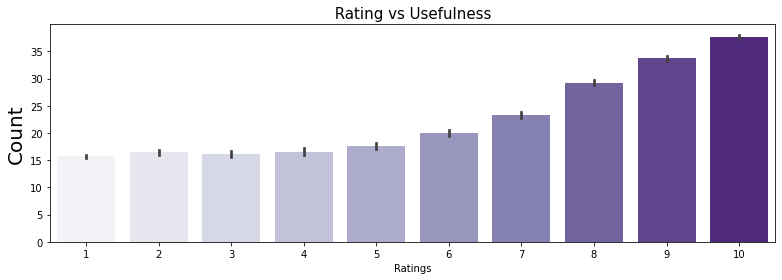

In [13]:
sns.barplot(data['rating'], data['usefulCount'], palette = 'Purples')
plt.xlabel('Ratings')
plt.ylabel('Count', fontsize = 20)
plt.title(' Rating vs Usefulness ', fontsize = 15)
plt.show()

#### OBSERVATION:we can see as rating is increasing thr useful count fot drug is also increasing

## Calculating Effectiveness and Usefulness of Drugs

In [14]:
#Calculate an Effective Rating
min_rating = data['rating'].min()
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1  
data['effective'] = data['rating'].apply(scale_rating)
data[["effective","rating"]].groupby(["rating"]).head(5)

,effective,rating
0,1,9
1,1,8
2,0,5
3,1,8
4,1,9
5,0,2
6,0,1
7,1,10
8,0,1
9,1,8


In [15]:
# lets also calculate Usefulness Score
data['usefulness'] = data['rating']*data['usefulCount']*data['effective']
# Top 10 Most Useful Drugs 
data[['drugName','condition','usefulness']][data['usefulness'] > data['usefulness'].mean()].sort_values(by = 'usefulness', ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Zoloft,Depression,12910
1,Sertraline,Depression,12910
2,Mirena,Birth Control,12470
3,Levonorgestrel,Birth Control,12470
4,Zoloft,Depression,8541
5,Adipex-P,Weight Loss,7960
6,Phentermine,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


### Analyzing the Medical Condtitions

In [16]:
##calculate the Number of Useless and Useful Drugs for Each medical Condition
@interact
def check(condition = list(data['condition'].value_counts().index)):
    return data[data['condition'] == condition]['effective'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

In [17]:
#10 Most Common Conditions

print("Number of Unique Conditions :", data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of Unique Conditions : 884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

### Prescribing Most Useful and Other Useless Drugs for each Condition

In [18]:
# lets remove all the Duplicates from the Dataset
data = data.drop_duplicates()

In [19]:
# lets find the Highest and Lowest Rated Drugs for each Condition
@interact
def high_low_rate(condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness', ascending = False).head(5).reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',).head(5).reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…